# Day 17

## Part 1

- rocks fall! ...everyone hopefuly doesn't die
- rocks fall in the same order: `-`, `+`, `J`, `|`, `o`
- the rocks don't spin but can translate left and right
- this is all in a vertical chamber that is 7 units wide
- rocks appear such that it's left edge is 2 units from the left wall and it's bottom is 3 units above the highest rock in the room/the floor.
- rocks alternate between being pushed by hot gas and falling
- if a rock would move into a wall or the floor or another rock it doesn't
- a new rock appears immediately after the last rock stops being able to fall further

`How many units tall will the tower of rocks be after 2022 rocks have stopped falling?`

In [123]:
from copy import deepcopy
from itertools import cycle
from matplotlib import pyplot as plt
from utils import parse_from_file, ParseConfig

parser = ParseConfig('', str)

rock_moves = cycle(parse_from_file('day_17.txt', parser))

print(''.join([move for move, _ in zip(deepcopy(rock_moves), range(10))]))

>>>><>>><<


In [124]:
air = 0
static_rock = 1
moving_rock = 2

CHAMBER_WIDTH = 7

# the coordinates of each rock refereced to the lower left corner
rocks = cycle((
    ((0, 0), (1, 0), (2, 0), (3, 0)),  # -
    ((1, 0), (0, 1), (1, 1), (2, 1), (1, 2)),  # +
    ((0, 0), (1, 0), (2, 0), (2, 1), (2, 2)),  # J
    ((0, 0), (0, 1), (0, 2), (0, 3)),  # |
    ((0, 0), (1, 0), (0, 1), (1, 1))  # o
))

In [125]:
def chamber_with_rock(
    chamber: list[list[int]], rock: tuple[tuple[int]], position: tuple[int]
) -> list[list[int]]:
    """
    returns a copy of the chamber with the rock in the position passed for the
    purpose of plotting.
    """
    temp_chamber = deepcopy(chamber)
    px, py = position
    for x, y in rock:
        temp_chamber[y + py][x + px] = moving_rock
    return temp_chamber

Text(0.5, 0.98, "Let's get ready to rrrock!")

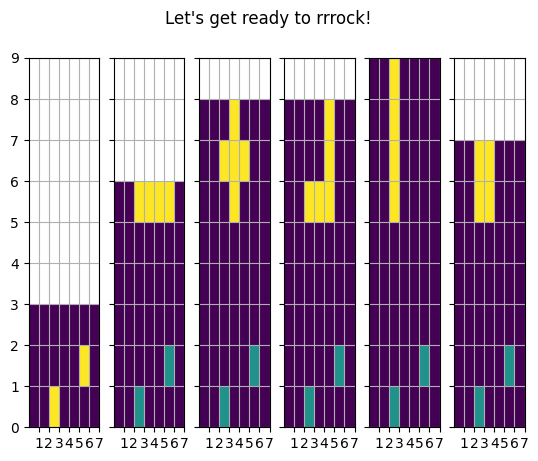

In [126]:
def get_chamber_extension(
    chamber: list[list[int]], rock: tuple[tuple[int]]
) -> tuple[list[list[int]], tuple[int]]:
    """
    returns the new rows required (not appended in this call) for a new rock
    and the coordinates of it's lower left corner
    """
    row_buffer_height = 3
    existing_empty_rows = sum(
        [all([space == air for space in row]) for row in reversed(chamber)])
    rock_height = max([y for _, y in rock]) + 1

    extension = [
        [air for _ in range(CHAMBER_WIDTH)]
        for __ in range(rock_height + row_buffer_height - existing_empty_rows)
    ]
    start_pos = (2, len(chamber) - existing_empty_rows + row_buffer_height)

    return extension, start_pos

test_chamber = [
    [air, air, static_rock, air, air, air, air],
    [air, air, air, air, air, static_rock, air],
    [air, air, air, air, air, air, air],
]

fig, _ = plt.subplots(nrows=1, ncols=6, sharey=True, sharex=True)
fig.axes[0].pcolormesh(test_chamber)
fig.axes[0].grid('ON')
for _, rock, ax in zip(range(5), deepcopy(rocks), fig.axes[1:]):
    temp_chamber = deepcopy(test_chamber)
    new_rows, start = get_chamber_extension(temp_chamber, rock)
    temp_chamber += new_rows
    ax.pcolormesh(chamber_with_rock(temp_chamber, rock, start))
    ax.grid('ON')
    ax.set_xticks(range(1, 8))
fig.suptitle('Let\'s get ready to rrrock!')

In [127]:
# wrote this func to help debug
def plot_snapshots(snapshots: list[list[list[int]]]):
    """
    creates a plot of the snapshots passed
    """
    fig, axes = plt.subplots(
        nrows=1, ncols=len(snapshots), sharey=True, sharex=True)
    for ax, snapshot in zip(fig.axes, snapshots):
        ax.pcolormesh(snapshot)
        ax.grid('ON')
        ax.set_xticks(range(1, 8))
        ax.set_yticks(range(1, len(snapshot)))
    fig.suptitle('Snapshots')

In [128]:
# ok let's run this and see what we get
chamber = []
# snapshots = []
moves = deepcopy(rock_moves)
for iteration, rock in zip(range(2022), deepcopy(rocks)):
    # pop a new rock into the chamber
    new_rows, (x, y) = get_chamber_extension(chamber, rock)
    # print()
    keep_falling = True
    chamber += new_rows
    # snapshots.append(chamber_with_rock(chamber, rock, (x, y)))
    while keep_falling:
        # update stopped check
        keep_falling = False
        # lateral movement
        move = next(moves)
        if move == '>' and all([]):
            for part_x, part_y in rock:
                temp_x = part_x + x + 1
                if temp_x >= CHAMBER_WIDTH:
                    # print(move, 'right wall')
                    break
                if chamber[y + part_y][temp_x] == static_rock:
                    # print(move, 'right rock')
                    break
            else:
                x += 1
        elif move == '<':
            for part_x, part_y in rock:
                temp_x = part_x + x - 1
                if temp_x < 0:
                    # print(move, 'left wall')
                    break
                if chamber[y + part_y][temp_x] == static_rock:
                    # print(move, 'left rock')
                    break
            else:
                x -= 1
        # vertical movement
        # print(move, x, y)
        for part_x, part_y in rock:
            temp_y = y + part_y - 1
            if temp_y < 0:
                # print('v', 'hit bottom')
                break
            if chamber[temp_y][x + part_x] == static_rock:
                # print('v', 'hit rock')
                break
        else:
            y -= 1
            keep_falling = True
    # add the moving rock to the chamber
    for part_x, part_y in rock:
        chamber[y + part_y][x + part_x] = static_rock
# plot_snapshots(snapshots)

In [129]:
_, (_, next_y) = get_chamber_extension(chamber, ((0, 0), ))

top_of_the_rocks = next_y - 3

print(f'the rock pile reached a height of: {top_of_the_rocks}!')

the rock pile reached a height of: 3092!
